<a href="https://colab.research.google.com/github/hira-14/movie_recommender/blob/main/01_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_PATH = '/content/drive/MyDrive/ml-1m/ml-1m'

In [ ]:
users_cols = ['user_id', 'gender', 'age', 'occupation', 'zipcode']
ratings_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
movies_cols = ['movie_id', 'title', 'genres']

In [ ]:
users = pd.read_csv(DATA_PATH + '/users.dat', sep='::',
                    engine='python', names=users_cols, encoding='latin-1')
ratings = pd.read_csv(DATA_PATH + '/ratings.dat', sep='::',
                      engine='python', names=ratings_cols, encoding='latin-1')
movies = pd.read_csv(DATA_PATH + '/movies.dat', sep='::',
                     engine='python', names=movies_cols, encoding='latin-1')

In [ ]:
print('Dataset Shape: ')
print('Users: ', users.shape)
print('Ratings: ', ratings.shape)
print('Movies: ', movies.shape)

Dataset Shape: 
Users:  (6040, 5)
Ratings:  (1000209, 4)
Movies:  (3883, 3)


In [ ]:
# Cell 3: Basic Inspection
def inspect_data(df, name):
    print("Dataset- ",name)
    print("First 5 rows:")
    display(df.head())
    print("\nData types:")
    print(df.dtypes)
    print("\nNull values:")
    print(df.isnull().sum())
    print("\nUnique counts:")
    print(df.nunique())

inspect_data(users, "Users")


Dataset-  Users
First 5 rows:


,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455



Data types:
user_id        int64
gender        object
age            int64
occupation     int64
zipcode       object
dtype: object

Null values:
user_id       0
gender        0
age           0
occupation    0
zipcode       0
dtype: int64

Unique counts:
user_id       6040
gender           2
age              7
occupation      21
zipcode       3439
dtype: int64


In [ ]:
inspect_data(ratings, "Ratings")


Dataset-  Ratings
First 5 rows:


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291



Data types:
user_id      int64
movie_id     int64
rating       int64
timestamp    int64
dtype: object

Null values:
user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

Unique counts:
user_id        6040
movie_id       3706
rating            5
timestamp    458455
dtype: int64


In [ ]:
inspect_data(movies, "Movies")

Dataset-  Movies
First 5 rows:


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy



Data types:
movie_id     int64
title       object
genres      object
dtype: object

Null values:
movie_id    0
title       0
genres      0
dtype: int64

Unique counts:
movie_id    3883
title       3883
genres       301
dtype: int64


No null values. Handling missing values is not required

Merging the dataset for broader analaysis of the data.

In [ ]:
# Merge all three datasets
df = ratings.merge(users, on='user_id').merge(movies, on='movie_id')

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

print("\nMerged dataset shape:", df.shape)
print("Merged columns:", df.columns.tolist())
display(df.head(2))


Merged dataset shape: (1000209, 10)
Merged columns: ['user_id', 'movie_id', 'rating', 'timestamp', 'gender', 'age', 'occupation', 'zipcode', 'title', 'genres']


,user_id,movie_id,rating,timestamp,gender,age,occupation,zipcode,title,genres
0,1,1193,5,2000-12-31 22:12:40,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,2000-12-31 22:35:09,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical


In [ ]:
inspect_data(df, "Merged")

Dataset-  Merged
First 5 rows:


,user_id,movie_id,rating,timestamp,gender,age,occupation,zipcode,title,genres
0,1,1193,5,2000-12-31 22:12:40,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,2000-12-31 22:35:09,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,2000-12-31 22:32:48,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,2000-12-31 22:04:35,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,2001-01-06 23:38:11,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy



Data types:
user_id                int64
movie_id               int64
rating                 int64
timestamp     datetime64[ns]
gender                object
age                    int64
occupation             int64
zipcode               object
title                 object
genres                object
dtype: object

Null values:
user_id       0
movie_id      0
rating        0
timestamp     0
gender        0
age           0
occupation    0
zipcode       0
title         0
genres        0
dtype: int64

Unique counts:
user_id         6040
movie_id        3706
rating             5
timestamp     458455
gender             2
age                7
occupation        21
zipcode         3439
title           3706
genres           301
dtype: int64


/tmp/ipython-input-13-2856390873.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')


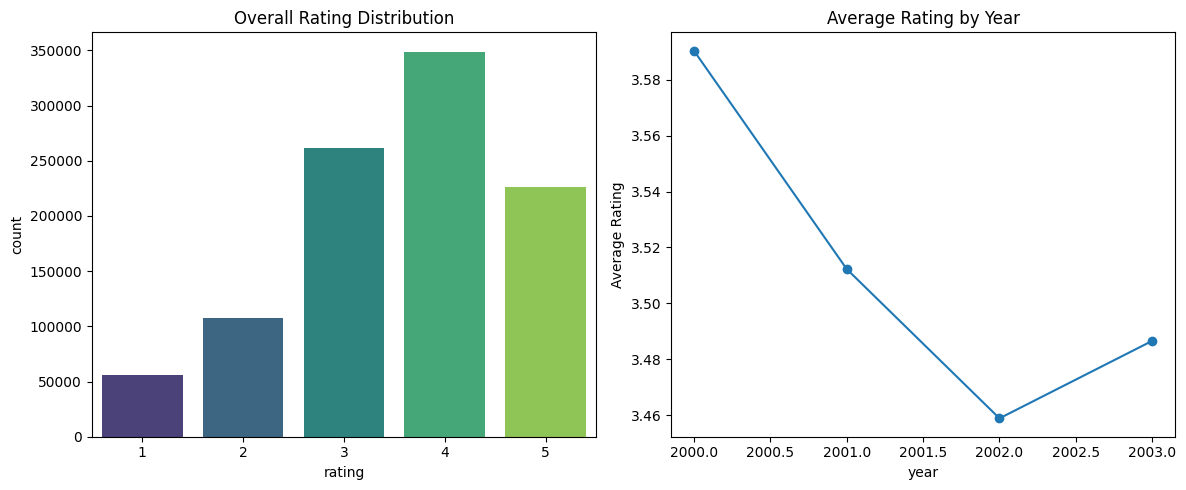


Rating Statistics:
count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


In [ ]:
#Rating Distribution Analysis
plt.figure(figsize=(12, 5))

# Rating histogram
plt.subplot(1, 2, 1)
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Overall Rating Distribution')

# Average rating over time
plt.subplot(1, 2, 2)
df['year'] = df['timestamp'].dt.year
yearly_avg = df.groupby('year')['rating'].mean()
yearly_avg.plot(marker='o')
plt.title('Average Rating by Year')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

print("\nRating Statistics:")
print(df['rating'].describe())

/tmp/ipython-input-14-3252568401.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_movies.index, x=top_movies.values, palette='rocket')


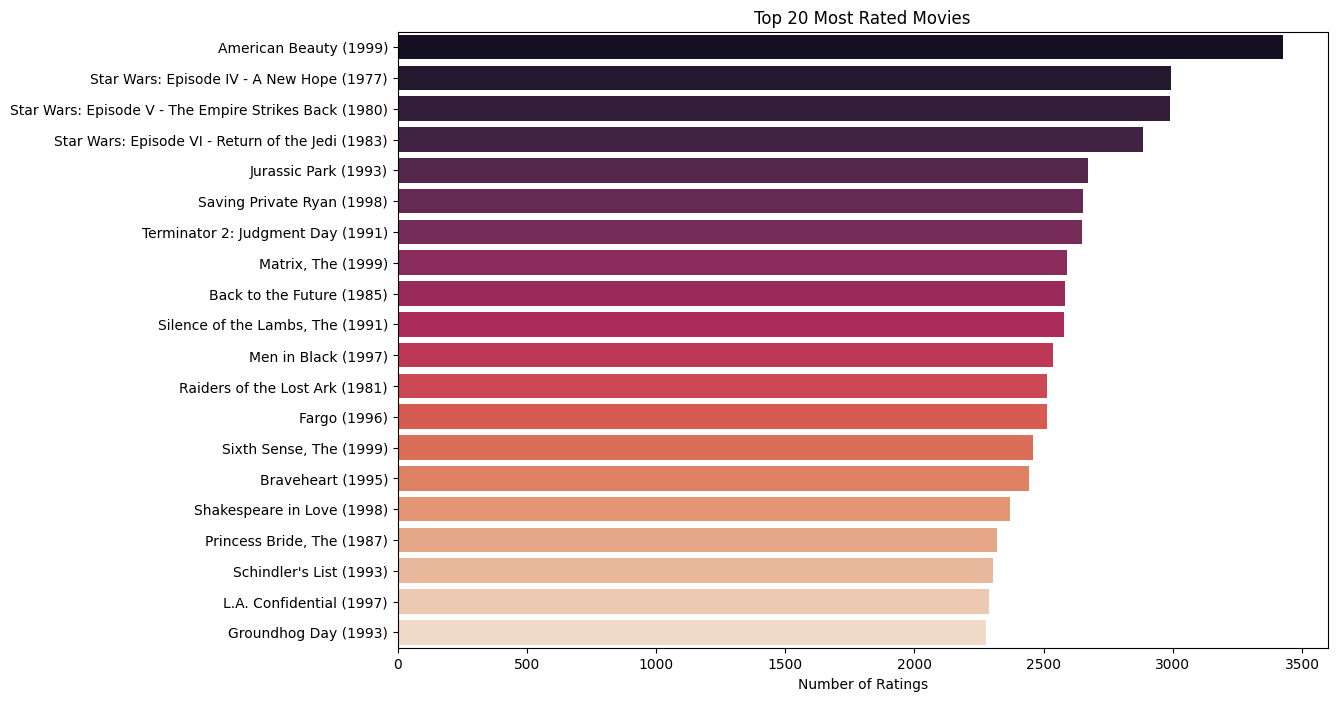

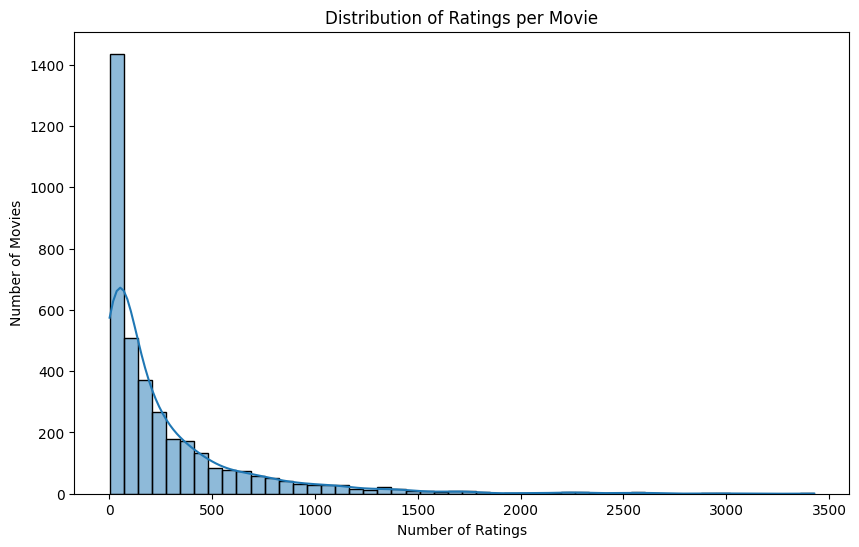


Top 1% movies account for 8.7% of all ratings


In [ ]:
# Popularity Bias Analysis
# Top 20 most rated movies
top_movies = df['title'].value_counts().head(20)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_movies.index, x=top_movies.values, palette='rocket')
plt.title('Top 20 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('')
plt.show()

# Rating distribution across all movies
movie_ratings_count = df.groupby('movie_id')['rating'].count()
plt.figure(figsize=(10, 6))
sns.histplot(movie_ratings_count, bins=50, kde=True)
plt.title('Distribution of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.show()

print(f"\nTop 1% movies account for {movie_ratings_count.nlargest(int(len(movie_ratings_count)*0.01)).sum()/movie_ratings_count.sum():.1%} of all ratings")

/tmp/ipython-input-16-4129505294.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age', data=df, palette='coolwarm')


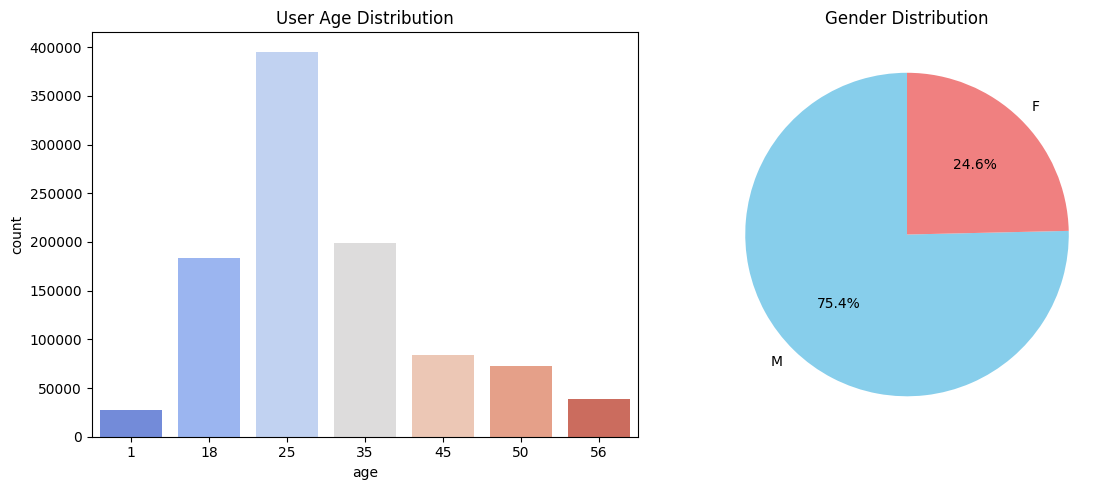

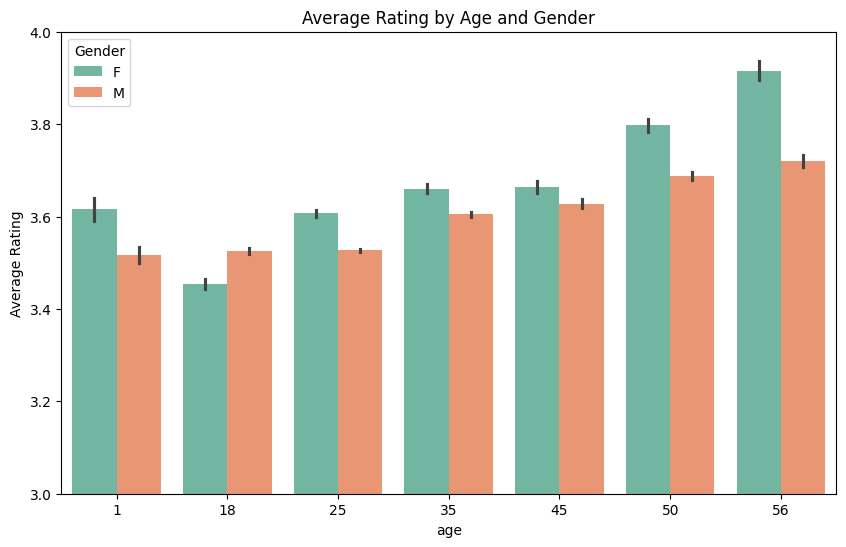

In [ ]:
# Demographic Analysis (Age/Gender)
# Age distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='age', data=df, palette='coolwarm')
plt.title('User Age Distribution')

# Gender distribution
plt.subplot(1, 2, 2)
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
        colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Gender Distribution')
plt.tight_layout()
plt.show()

# Average rating by demographic
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='rating', hue='gender', data=df, palette='Set2')
plt.title('Average Rating by Age and Gender')
plt.ylabel('Average Rating')
plt.ylim(3, 4)  # Focus on meaningful range
plt.legend(title='Gender')
plt.show()

In [ ]:

mean_by_gender = df.groupby('gender')['rating'].mean()
print("Mean Rating by Gender:\n", mean_by_gender)

# 4. Mean rating by age bracket
mean_by_age = df.groupby('age')['rating'].mean()
print("Mean Rating by Age:\n", mean_by_age)

Mean Rating by Gender:
 gender
F    3.620366
M    3.568879
Name: rating, dtype: float64
Mean Rating by Age:
 age
1     3.549520
18    3.507573
25    3.545235
35    3.618162
45    3.638062
50    3.714512
56    3.766632
Name: rating, dtype: float64


/tmp/ipython-input-17-3555278117.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='Spectral')


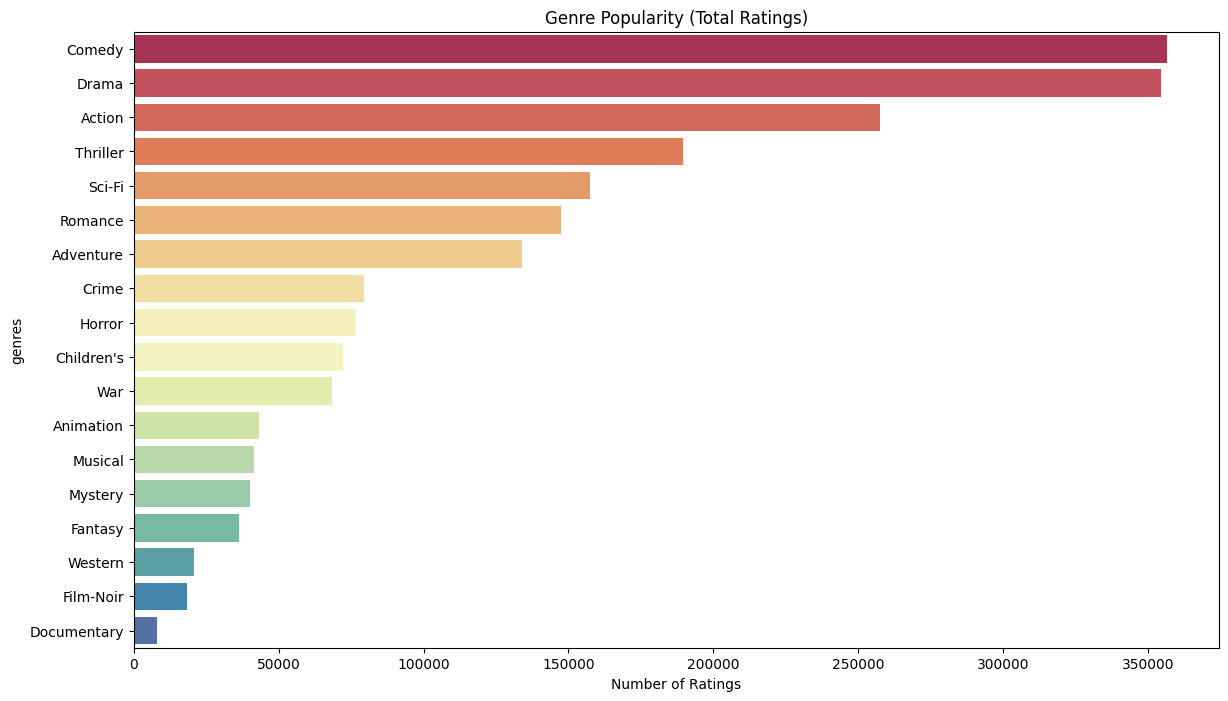

/tmp/ipython-input-17-3555278117.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y='genres', x='rating', data=df_genres, ci=None, palette='Spectral')
/tmp/ipython-input-17-3555278117.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='genres', x='rating', data=df_genres, ci=None, palette='Spectral')


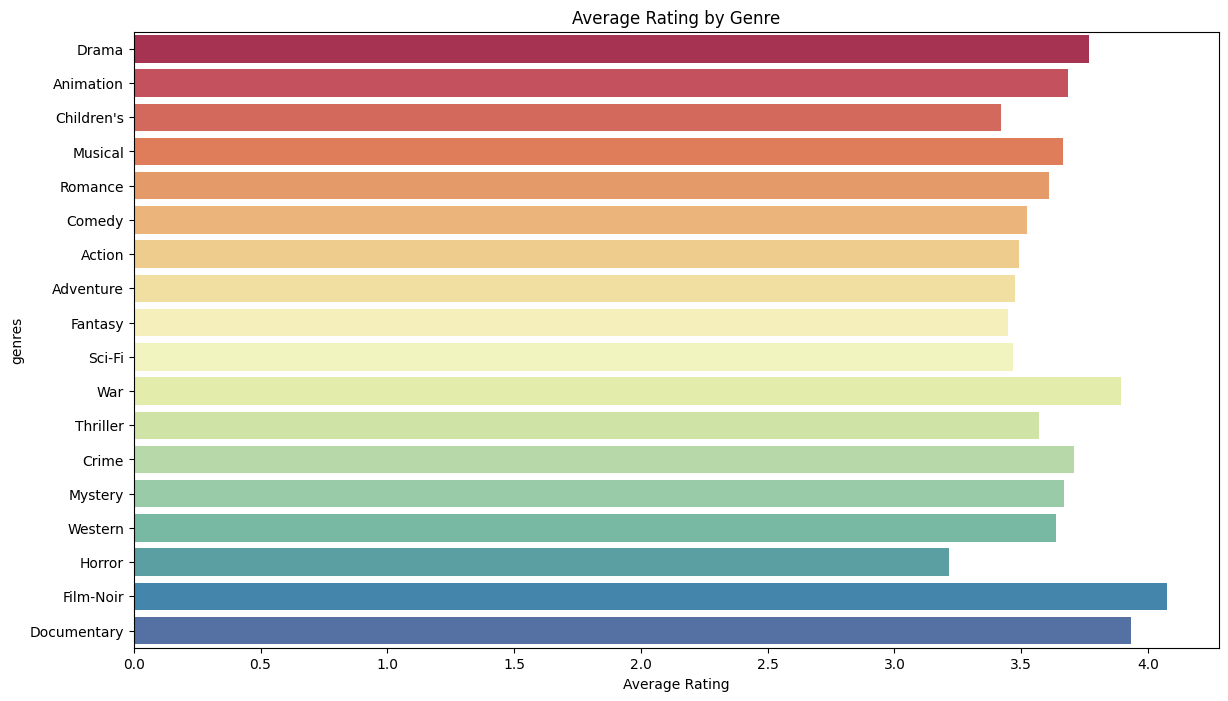

In [ ]:
# Genre Analysis
# Explode genres into separate rows
df_genres = df.copy()
df_genres['genres'] = df_genres['genres'].str.split('|')
df_genres = df_genres.explode('genres')

# Genre popularity
plt.figure(figsize=(14, 8))
genre_counts = df_genres['genres'].value_counts()
sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='Spectral')
plt.title('Genre Popularity (Total Ratings)')
plt.xlabel('Number of Ratings')
plt.show()

# Average rating by genre
plt.figure(figsize=(14, 8))
sns.barplot(y='genres', x='rating', data=df_genres, ci=None, palette='Spectral')
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.show()

In [ ]:
# Bias Metrics Calculation
# Gender rating gap
gender_avg = df.groupby('gender')['rating'].mean()
gender_gap = gender_avg['M'] - gender_avg['F']
print(f"Gender Rating Gap (Male - Female): {gender_gap:.4f}")

# Age group representation
age_bins = [0, 18, 25, 35, 45, 55, 100]
age_labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

age_rep = df['age_group'].value_counts(normalize=True).sort_index()
print("\nAge Group Representation:")
print(age_rep)

# Genre representation by gender
genre_gender = pd.crosstab(df_genres['genres'], df_genres['gender'], normalize='index')
genre_gender['Difference'] = genre_gender['M'] - genre_gender['F']
print("\nGenre Representation Gender Difference:")
print(genre_gender.sort_values('Difference', ascending=False).head(10))

Gender Rating Gap (Male - Female): -0.0515

Age Group Representation:
age_group
<18      0.210703
18-25    0.395473
26-35    0.198961
36-45    0.083616
46-55    0.072475
56+      0.038772
Name: proportion, dtype: float64

Genre Representation Gender Difference:
gender            F         M  Difference
genres                                   
Western    0.168109  0.831891    0.663782
Sci-Fi     0.174196  0.825804    0.651608
Action     0.177311  0.822689    0.645378
Horror     0.191593  0.808407    0.616815
Adventure  0.204042  0.795958    0.591917
War        0.205656  0.794344    0.588688
Crime      0.206711  0.793289    0.586578
Thriller   0.212505  0.787495    0.574989
Film-Noir  0.230108  0.769892    0.539784
Fantasy    0.240159  0.759841    0.519683


In [ ]:
df.to_pickle(DATA_PATH + '/raw_merged.pkl')
